In [2]:
# Módulos
import os
#from kaggle.api.kaggle_api_extended import KaggleApi
#import opendatasets as od
#import session_info
import association_metrics as am

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from word2number import w2n

import numpy as np
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from collections import Counter
import warnings
import pickle

import seaborn as sns
import matplotlib.pyplot as plt

set_config(transform_output="pandas")
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [3]:
#Tabla con informacion
df_train_ori=pd.read_csv('sp_train_data.csv',encoding="utf-8")

In [6]:
df_train_ori

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1970,1970,Hip,CompShg,Plywood,Plywood,BrkFace,288.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1304,1304,GasA,Gd,Y,SBrkr,1682,0,0,1682,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1970.0,Unf,2,530,TA,TA,Y,98,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1,2,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
2,3,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24,Unf,0,732,756,GasA,Ex,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
3,4,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
4,5,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7,6,1996,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385,ALQ,344,70,799,GasA,Ex,Y,SBrkr,827,834,0,1661,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,Y,158,61,0,0,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,1018,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1018,1019,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1019,1020,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1020,1021,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr,912,514,0,

In [4]:
df_test_ori=pd.read_csv('sp_test_data.csv',encoding="utf-8")

In [7]:
df_test_ori

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1023,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1,1024,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,1025,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
3,1026,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
4,1027,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1456,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,846,Unf,0,210,1056,GasA,Fa,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1958.0,RFn,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
434,1457,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,3,8,1955,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,256,Unf,0,906,1162,GasA,Ex,Y,SBrkr,1163,0,0,1163,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,220,Fa,TA,Y,142,98,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
435,1458,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
436,1459,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0,Unf,0,684,684,GasA,Gd,Y,SBrkr,684,512,0,1196,0,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2,528

In [5]:
df_train_test = pd.concat([df_train_ori, df_test_ori], ignore_index=True)

In [12]:
df_train_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Establece el porcentaje de nulos permitido
umbral = 0.7
# Encuentra las columnas que exceden el umbral
cols_a_eliminar = df_train_test.columns[df_train_test.isnull().mean() > umbral]
# Elimina las columnas
df_train_test.drop(cols_a_eliminar, axis=1, inplace=True)
#df_train_test.info()

In [14]:
df_train_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1022.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181312.692759
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,77617.461005
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


In [7]:
#df_train_test.info()

In [8]:
#cols_a_eliminar

In [9]:
#df_train_test.select_dtypes(exclude=['int64',"float64"]).sample(5)

In [10]:
#df_train_test.select_dtypes(include=['int64',"float64"]).sample(5)

In [15]:
categorical_columns = ["MSZoning","Street","LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood"
                     ,"Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
                     ,"Exterior2nd","ExterQual","ExterCond","Foundation","Heating","HeatingQC","CentralAir"
                     ,"KitchenQual","Functional","PavedDrive","SaleType","SaleCondition"
                      ,"MSSubClass","OverallQual","OverallCond","MasVnrType",'BsmtQual',"BsmtCond"
                      ,"BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish",
                      "GarageQual","GarageCond","Electrical"]


In [16]:
## Etiquetado de variables
numerical_columns = ["LotFrontage","LotArea","YearBuilt","YearRemodAdd","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF","1stFlrSF",
                     "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr"
                     ,"TotRmsAbvGrd","Fireplaces","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","MiscVal","MoSold","YrSold"
                     ,"3SsnPorch","ScreenPorch","PoolArea","MasVnrArea","GarageYrBlt","BsmtUnfSF","GarageCars"]

id= "Id"

tgt = "SalePrice"

In [13]:
#llenar los vacios con 0
df_train_test['LotFrontage'].fillna(0, inplace=True)

In [14]:
condicion = (df_train_test['MasVnrArea'] == 0) | (df_train_test['MasVnrArea'].isnull())
# Actualiza MasVnrType basado en la condición
df_train_test.loc[condicion, 'MasVnrType'] = 'None'

In [15]:
df_train_test['MasVnrType'].fillna('None', inplace=True)
df_train_test['BsmtQual'].fillna('NA', inplace=True)

In [16]:
##revisar consistencia
for i in df_train_test.filter(categorical_columns):
  print(i)
  values = df_train_test[i].astype(str).unique()
  values.sort()
  display(values)
  print("\n")

MSZoning


array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object)



Street


array(['Grvl', 'Pave'], dtype=object)



LotShape


array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)



LandContour


array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object)



Utilities


array(['AllPub', 'NoSeWa'], dtype=object)



LotConfig


array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object)



LandSlope


array(['Gtl', 'Mod', 'Sev'], dtype=object)



Neighborhood


array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)



Condition1


array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)



Condition2


array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
      dtype=object)



BldgType


array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object)



HouseStyle


array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
       'SFoyer', 'SLvl'], dtype=object)



RoofStyle


array(['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard', 'Shed'], dtype=object)



RoofMatl


array(['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll', 'Tar&Grv',
       'WdShake', 'WdShngl'], dtype=object)



Exterior1st


array(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
       'VinylSd', 'Wd Sdng', 'WdShing'], dtype=object)



Exterior2nd


array(['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd',
       'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'Stone',
       'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng'], dtype=object)



ExterQual


array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)



ExterCond


array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)



Foundation


array(['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone', 'Wood'], dtype=object)



Heating


array(['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall'], dtype=object)



HeatingQC


array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)



CentralAir


array(['N', 'Y'], dtype=object)



KitchenQual


array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)



Functional


array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sev', 'Typ'], dtype=object)



PavedDrive


array(['N', 'P', 'Y'], dtype=object)



SaleType


array(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'],
      dtype=object)



SaleCondition


array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)



MSSubClass


array(['120', '160', '180', '190', '20', '30', '40', '45', '50', '60',
       '70', '75', '80', '85', '90'], dtype=object)



OverallQual


array(['1', '10', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)



OverallCond


array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)



MasVnrType


array(['BrkCmn', 'BrkFace', 'None', 'Stone'], dtype=object)



BsmtQual


array(['Ex', 'Fa', 'Gd', 'NA', 'TA'], dtype=object)



BsmtCond


array(['Fa', 'Gd', 'Po', 'TA', 'nan'], dtype=object)



BsmtExposure


array(['Av', 'Gd', 'Mn', 'No', 'nan'], dtype=object)



BsmtFinType1


array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', 'nan'], dtype=object)



BsmtFinType2


array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'Rec', 'Unf', 'nan'], dtype=object)



FireplaceQu


array(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'nan'], dtype=object)



GarageType


array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd',
       'nan'], dtype=object)



GarageFinish


array(['Fin', 'RFn', 'Unf', 'nan'], dtype=object)



GarageQual


array(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'nan'], dtype=object)



GarageCond


array(['Ex', 'Fa', 'Gd', 'Po', 'TA', 'nan'], dtype=object)



Electrical


array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr', 'nan'], dtype=object)

In [17]:
df_train_test['FireplaceQu'].fillna('NA', inplace=True)
df_train_test['GarageType'].fillna('NA', inplace=True)
df_train_test['GarageYrBlt'].fillna(0, inplace=True)
df_train_test['GarageFinish'].fillna('NA', inplace=True)
df_train_test['GarageQual'].fillna('NA', inplace=True)
df_train_test['GarageCond'].fillna('NA', inplace=True)
df_train_test['MasVnrArea'].fillna(0, inplace=True)
df_train_test['BsmtCond'].fillna('NA', inplace=True)
df_train_test['BsmtExposure'].fillna('NA', inplace=True)
df_train_test['BsmtFinType1'].fillna('NA', inplace=True)
df_train_test['BsmtFinType2'].fillna('NA', inplace=True)
df_train_test['Electrical'].fillna('SBrkr', inplace=True)

In [18]:
#columns_to_convert = [
#    "YearBuilt", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", 
#    "2ndFlrSF", "BsmtHalfBath", "FullBath", "BedroomAbvGr", "Fireplaces",
#    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "ScreenPorch",
#    "MoSold", "YrSold"
#]
#
#for col in columns_to_convert:
#    print(f'df_train_test["{col}"] = df_train_test["{col}"].astype("float64")')

In [19]:

#normalizar  OverallQual y OverallCond
#10: Muy excelente    4 
#9: Excelente   4
#8: Muy bueno  3
#7: Bueno    3
#6: Por encima del promedio  2
#5: Promedio    2
#4: Por debajo del promedio  1 
#3: Regular      1
#2: Malo         0
#1: Muy malo     0

df_train_test["OverallQual"].replace({
    10: 4,
    9: 4,
    8: 4,
    7: 3,
    6: 2,
    5: 2,
    4: 1,
    3:1,
    2:0,
    1:0  
}, inplace=True)

df_train_test["OverallCond"].replace({
    10: 4,
    9: 4,
    8: 3,
    7: 3,
    6: 2,
    5: 2,
    4: 1,
    3:1,
    2:0,
    1:0  
}, inplace=True)

In [20]:
df_train_test["ExterQual"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["ExterCond"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["HeatingQC"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["KitchenQual"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["BsmtQual"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["BsmtCond"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0,'NA':0 }, inplace=True)
df_train_test["FireplaceQu"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["GarageQual"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)
df_train_test["GarageCond"].replace({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0 ,'NA':0}, inplace=True)

In [21]:
df_train_test["ExterQual"]=df_train_test["ExterQual"].astype(int)
df_train_test["ExterCond"]=df_train_test["ExterCond"].astype(int)
df_train_test["HeatingQC"]=df_train_test["HeatingQC"].astype(int)
df_train_test["KitchenQual"]=df_train_test["KitchenQual"].astype(int)
df_train_test["BsmtQual"]=df_train_test["BsmtQual"].astype(int)
df_train_test["BsmtCond"]=df_train_test["BsmtCond"].astype(int)
df_train_test["FireplaceQu"]=df_train_test["FireplaceQu"].astype(int)
df_train_test["GarageQual"]=df_train_test["GarageQual"].astype(int)
df_train_test["GarageCond"]=df_train_test["GarageCond"].astype(int)
df_train_test["LotArea"]=df_train_test["LotArea"].astype('float64')
df_train_test["YearBuilt"] = df_train_test["YearBuilt"].astype("float64")
df_train_test["BsmtFinSF1"] = df_train_test["BsmtFinSF1"].astype("float64")
df_train_test["BsmtFinSF2"] = df_train_test["BsmtFinSF2"].astype("float64")
df_train_test["BsmtUnfSF"] = df_train_test["BsmtUnfSF"].astype("float64")
df_train_test["TotalBsmtSF"] = df_train_test["TotalBsmtSF"].astype("float64")
df_train_test["2ndFlrSF"] = df_train_test["2ndFlrSF"].astype("float64")
df_train_test["BsmtHalfBath"] = df_train_test["BsmtHalfBath"].astype("float64")
df_train_test["FullBath"] = df_train_test["FullBath"].astype("float64")
df_train_test["BedroomAbvGr"] = df_train_test["BedroomAbvGr"].astype("float64")
df_train_test["Fireplaces"] = df_train_test["Fireplaces"].astype("float64")
df_train_test["GarageArea"] = df_train_test["GarageArea"].astype("float64")
df_train_test["WoodDeckSF"] = df_train_test["WoodDeckSF"].astype("float64")
df_train_test["OpenPorchSF"] = df_train_test["OpenPorchSF"].astype("float64")
df_train_test["EnclosedPorch"] = df_train_test["EnclosedPorch"].astype("float64")
df_train_test["ScreenPorch"] = df_train_test["ScreenPorch"].astype("float64")
df_train_test["MoSold"] = df_train_test["MoSold"].astype("float64")
df_train_test["YrSold"] = df_train_test["YrSold"].astype("float64")

In [22]:
#No hay duplicidad por lo cual se elimina esta variable
#df = df.drop('Id', axis=1)

In [23]:
#Definimos función para ver variables categóricas unitarias
def categoricas_unitarias(df_train_test,col):
    result=pd.DataFrame(df_train_test[col].value_counts(1))
    if result.shape[0]>0:
        if (result['proportion'].values[0]>.95) :
            print(f"{col} -- VARIABLE UNITARIA")
        result['proportion'] = result['proportion'].map(lambda x:str(round(x*100,2))+"%")
        result.reset_index(inplace=True)
        result.columns=[col+"_valores","%_aparicion"]
    return result

In [24]:
#for col in df.columns:
#    display(categoricas_unitarias(df,col))
#    print("\n")

In [25]:
#Eliminamos la variables unitarias 
df_train_test=df_train_test.drop(columns = ["Street", 'Utilities', "Condition2", "RoofMatl", "Heating", "LowQualFinSF", "KitchenAbvGr",  "3SsnPorch", "PoolArea", "MiscVal"])


In [26]:
columns_to_remove = ["Street", 'Utilities', "Condition2", "RoofMatl", "Heating", "LowQualFinSF", "KitchenAbvGr",  "3SsnPorch", "PoolArea", "MiscVal"]

for col in columns_to_remove:
    if col in categorical_columns:
        categorical_columns.remove(col)

In [27]:
#############################################################
columns_to_remove = ["Street", 'Utilities', "Condition2", "RoofMatl", "Heating", "LowQualFinSF", "KitchenAbvGr",  "3SsnPorch", "PoolArea", "MiscVal"]

for col in columns_to_remove:
    if col in numerical_columns:
        numerical_columns.remove(col)

In [28]:
for column in categorical_columns:
  print(df_train_test[column].value_counts() / len(df_train_test))
  print()

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: count, dtype: float64

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: count, dtype: float64

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: count, dtype: float64

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: count, dtype: float64

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: count, dtype: float64

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
Blmngtn    0.011644
MeadowV    0.011

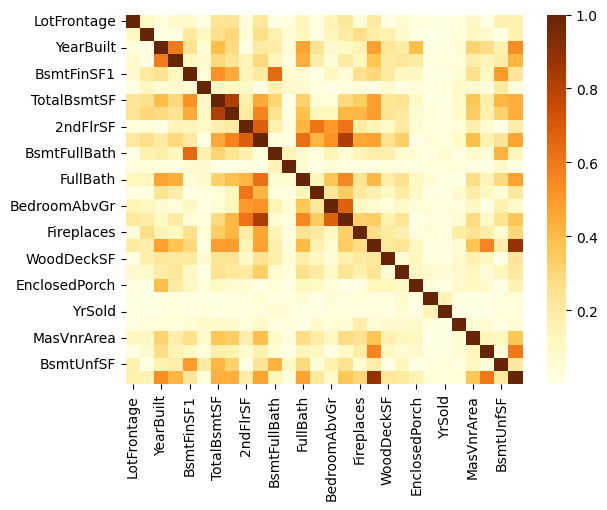

In [29]:
# Hacemos el mapa de calor para una mejor visualización de las correlaciones
sns.heatmap(np.abs(df_train_test[numerical_columns].corr()), annot=False, cmap= sns.color_palette("YlOrBr", as_cmap=True), annot_kws={"size": 10})
plt.show()

In [30]:
correlaciones=df_train_test[numerical_columns].corr()

In [31]:
variables_con_alta_corr = (correlaciones.stack()
                           .where(lambda x: abs(x) > 0.6)
                           .where(lambda x: x != 1)
                           .drop_duplicates())
print(variables_con_alta_corr)

LotFrontage   LotFrontage          NaN
BsmtFinSF1    BsmtFullBath    0.649212
TotalBsmtSF   1stFlrSF        0.819530
2ndFlrSF      GrLivArea       0.687501
              HalfBath        0.609707
              TotRmsAbvGrd    0.616423
GrLivArea     FullBath        0.630012
              TotRmsAbvGrd    0.825489
BedroomAbvGr  TotRmsAbvGrd    0.676620
GarageArea    GarageCars      0.882475
dtype: float64


In [32]:
#Eliminamos la variables con alta correlacion
#TotalBsmtSF  1stFlrSF        0.808633
#GrLivArea    TotRmsAbvGrd    0.825339
#GarageArea   GarageCars      0.886722


df_train_test=df_train_test.drop(columns = ["1stFlrSF","TotRmsAbvGrd","GarageCars","YearRemodAdd","BsmtFullBath"
                     ,"GrLivArea","HalfBath","TotRmsAbvGrd"])

In [33]:
columns_to_remove = ["1stFlrSF","TotRmsAbvGrd","GarageCars","YearRemodAdd","BsmtFullBath"
                     ,"GrLivArea","HalfBath","TotRmsAbvGrd"]

for col in columns_to_remove:
    if col in numerical_columns:
        numerical_columns.remove(col)

In [34]:
#Vemos las correlaciones de las categoricas
cramersv = am.CramersV(df_train_test[categorical_columns].astype('category')) 
matriz_correlaciones = cramersv.fit()

In [35]:
matriz_correlaciones

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,Electrical
MSZoning,1.000000,0.160798,0.114652,0.082503,0.088819,0.652480,0.102750,0.195389,0.196826,0.093425,0.202875,0.211868,0.244854,0.094685,0.230856,0.128120,0.301087,0.181886,0.057333,0.224525,0.167906,0.147952,0.350790,0.189124,0.149037,0.110702,0.172567,0.106697,0.083006,0.148720,0.074589,0.130390,0.220558,0.200511,0.136045,0.113342,0.115481
LotShape,0.160798,1.000000,0.134292,0.226854,0.127173,0.275455,0.128089,0.099326,0.100764,0.068371,0.127396,0.137698,0.120708,0.051265,0.130324,0.074357,0.116766,0.102786,0.038326,0.088023,0.054294,0.058572,0.191156,0.116481,0.069636,0.083156,0.149488,0.076441,0.117634,0.090243,0.091339,0.135087,0.156444,0.148305,0.095082,0.075778,0.123855
LandContour,0.114652,0.134292,1.000000,0.079609,0.459180,0.381687,0.068056,0.086507,0.143461,0.152131,0.152042,0.157682,0.141208,0.030584,0.116179,0.075167,0.136018,0.106958,0.055560,0.124931,0.079982,0.122025,0.171155,0.135628,0.072422,0.099059,0.106287,0.053332,0.199238,0.107611,0.056551,0.093274,0.132366,0.111406,0.067483,0.049694,0.073559
LotConfig,0.082503,0.226854,0.079609,1.000000,0.094846,0.187407,0.165425,0.086340,0.066816,0.094884,0.111057,0.126505,0.054254,0.040586,0.072309,0.053269,0.081998,0.050826,0.040643,0.059876,0.067914,0.067732,0.125601,0.055002,0.052690,0.047754,0.087221,0.057685,0.074437,0.083222,0.045289,0.073515,0.085540,0.061469,0.059475,0.074334,0.052859
LandSlope,0.088819,0.127173,0.459180,0.094846,1.000000,0.340029,0.056301,0.058608,0.067488,0.262720,0.165570,0.154320,0.104043,0.038902,0.076662,0.072390,0.011418,0.063653,0.098360,0.024995,0.053943,0.069577,0.130851,0.110928,0.084524,0.065008,0.034756,0.045587,0.227500,0.076447,0.099142,0.066408,0.126272,0.036165,0.019298,0.041522,0.021958
Neighborhood,0.652480,0.275455,0.381687,0.187407,0.340029,1.000000,0.224656,0.437404,0.320112,0.225846,0.314392,0.340828,0.501422,0.199462,0.435848,0.322669,0.402972,0.462022,0.152535,0.334641,0.212154,0.253855,0.393433,0.452042,0.267552,0.400079,0.482304,0.197168,0.274582,0.316174,0.199851,0.362053,0.324702,0.435825,0.255960,0.233831,0.220342
Condition1,0.102750,0.128089,0.068056,0.165425,0.056301,0.224656,1.000000,0.105972,0.112542,0.109945,0.121702,0.128608,0.145141,0.076475,0.109041,0.173444,0.084272,0.111001,0.067287,0.126793,0.081426,0.067866,0.147656,0.111951,0.093650,0.087192,0.150386,0.095661,0.097821,0.087286,0.077871,0.077899,0.115879,0.141771,0.087311,0.075430,0.084309
BldgType,0.195389,0.099326,0.086507,0.086340,0.058608,0.437404,0.105972,1.000000,0.170806,0.075488,0.189718,0.212241,0.183073,0.121583,0.197064,0.123302,0.293211,0.158246,0.084216,0.156099,0.122909,0.163776,0.895535,0.113596,0.117345,0.103904,0.210597,0.181694,0.167176,0.189662,0.161670,0.109619,0.188075,0.195203,0.129862,0.119895,0.096066
HouseStyle,0.196826,0.100764,0.143461,0.066816,0.067488,0.320112,0.112542,0.170806,1.000000,0.122962,0.187474,0.194836,0.189271,0.124101,0.226438,0.181574,0.243231,0.162087,0.077215,0.177352,0.092095,0.110063,0.851591,0.174308,0.154990,0.176604,0.196778,0.119757,0.210251,0.162608,0.089111,0.142755,0.212310,0.215443,0.163519,0.125510,0.128828
RoofStyle,0.093425,0.068371,0.152131,0.094884,0.262720,0.225846,0.109945,0.075488,0.122962,1.000000,0.169108,0.188921,0.157173,0.109146,0.108759,0.046468,0.080324,0.125555,0.140778,0.130718,0.049028,0.105705,0.237530,0.124009,0.079772,0.141174,0.152270,0.080327,0.127017,0.081745,0.094903,0.095860,0.093171,0.108078,0.063093,0.082174,0.033212


In [36]:
variables_con_alta_corr_cat = (matriz_correlaciones.stack()
                           .where(lambda x: abs(x) > 0.6)
                           .where(lambda x: x != 1)
                           .drop_duplicates())
print(variables_con_alta_corr_cat)

MSZoning     MSZoning             NaN
             Neighborhood    0.652480
BldgType     MSSubClass      0.895535
HouseStyle   MSSubClass      0.851591
Exterior1st  Exterior2nd     0.762010
GarageType   GarageFinish    0.687219
GarageQual   GarageCond      0.701880
dtype: float64


In [37]:
#Eliminamos la variables con alta correlacion
#MSZoning     MSZoning            NaN
#BldgType     MSSubClass     0.901909
#HouseStyle   MSSubClass     0.850704
#Exterior1st  Exterior2nd    0.794392
#GarageQual   GarageCond     0.774686


df_train_test=df_train_test.drop(columns = ["MSSubClass","Exterior2nd","GarageCond","GarageFinish"])

In [38]:
columns_to_remove = ["MSSubClass","Exterior2nd","GarageCond","GarageFinish"]

for col in columns_to_remove:
    if col in categorical_columns:
        categorical_columns.remove(col)

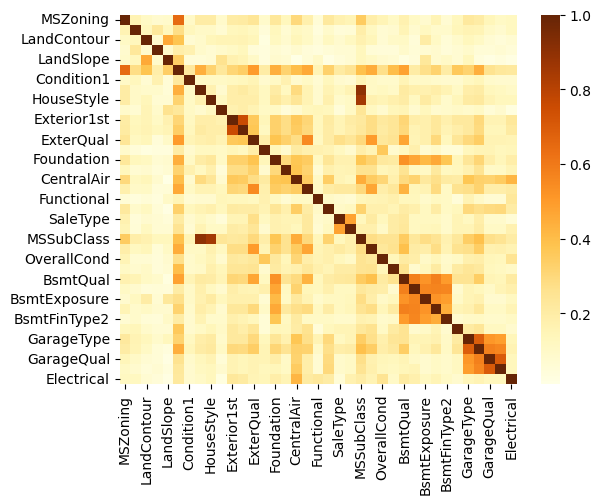

In [39]:
# Hacemos el mapa de calor para una mejor visualización de las correlaciones
sns.heatmap(matriz_correlaciones.round(2), annot=False, cmap= sns.color_palette("YlOrBr", as_cmap=True), annot_kws={"size": 10})
plt.show()

In [40]:
def get_iqr_list(df_series):
    q1 = df_series.quantile(.05)
    q3 = df_series.quantile(.95)
    iqr = q3 - q1
    iqr_ub = q3 + 1.5 * iqr
    iqr_lb = q1 - 1.5 * iqr
    iqr = df_series[(df_series < iqr_lb) | (df_series > iqr_ub)]
    return iqr

def get_percentiles_list(df_series):
    prcn_lb = df_series.quantile(.05)
    prcn_ub = df_series.quantile(.95)
    percentiles = df_series[(df_series <= prcn_lb) | (df_series >= prcn_ub)]
    return percentiles

def get_outliers(df, col):
  iqr = get_iqr_list(df[col])
  print("iqr_percentage:", len(iqr) / len(df) * 100)
  percentiles = get_percentiles_list(df[col])
  print("percentiles_percentage:", len(percentiles) / len(df) * 100)
  common_values = list(set(iqr.index).intersection(percentiles.index))
  print("outliers__percentage:", len(common_values) / len(df) * 100)
  print("total_outliers:", len(common_values))
  return common_values

In [41]:
#Revisamos cada una de las variables para encontrar el número de valores atipícos que podriamos optar por eliminar
n_outliers = {}

for n_col in numerical_columns:
  #print(n_col)
  n_outliers[n_col] = get_outliers(df_train_test[df_train_test['Id'] <= 1022], n_col)
  #print()


iqr_percentage: 0.19569471624266144
percentiles_percentage: 23.874755381604697
outliers__percentage: 0.19569471624266144
total_outliers: 2
iqr_percentage: 1.1741682974559686
percentiles_percentage: 10.273972602739725
outliers__percentage: 1.1741682974559686
total_outliers: 12
iqr_percentage: 0.0
percentiles_percentage: 11.056751467710372
outliers__percentage: 0.0
total_outliers: 0
iqr_percentage: 0.09784735812133072
percentiles_percentage: 36.986301369863014
outliers__percentage: 0.09784735812133072
total_outliers: 1
iqr_percentage: 0.684931506849315
percentiles_percentage: 94.22700587084148
outliers__percentage: 0.684931506849315
total_outliers: 7
iqr_percentage: 0.09784735812133072
percentiles_percentage: 10.176125244618394
outliers__percentage: 0.09784735812133072
total_outliers: 1
iqr_percentage: 0.0
percentiles_percentage: 61.25244618395303
outliers__percentage: 0.0
total_outliers: 0
iqr_percentage: 0.0
percentiles_percentage: 100.0
outliers__percentage: 0.0
total_outliers: 0
iqr_

In [42]:
all_outliers = set()
for k in n_outliers:
  all_outliers.update(n_outliers[k])
  df_train_test[k].iloc[n_outliers[k]] = np.nan

print("total_outliers:", len(all_outliers))
print("%:", len(all_outliers)/ df_train_test.shape[0])


total_outliers: 27
%: 0.018493150684931507


In [43]:
df_train_test = df_train_test.drop(all_outliers)

In [44]:
df_train = df_train_test[df_train_test['Id'] <= 1022]
df_test = df_train_test[df_train_test['Id'] > 1022]

In [45]:
X= df_train.drop(['SalePrice','Id'],axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=333,shuffle=True)
###############division de train y test

In [46]:
# Transformación Paralela*********************************************
preprocesado = ColumnTransformer(
                   [('scale', StandardScaler(), numerical_columns),
                    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first',sparse=False), categorical_columns)],
                     remainder='passthrough') #Garantiza que columnas que no están sujetas a ninguna transformación se incluyan en el conjunto de datos transformado.

X_train_pp = preprocesado.fit_transform(X_train)
X_test_pp  = preprocesado.transform(X_test)
#-------------------------
df_test = preprocesado.transform(df_test)


In [47]:
import pandas as pd

# Comparando número de columnas
if X_train_pp.shape[1] == df_test.shape[1]:
    print("Ambos DataFrames tienen el mismo número de columnas.")
else:
    print("Los DataFrames tienen un número diferente de columnas.")

# Comparando nombres de columnas
if set(X_train_pp.columns) == set(df_test.columns):
    print("Ambos DataFrames tienen los mismos nombres de columnas.")
else:
    print("Los DataFrames tienen diferentes nombres de columnas.")

# Comparando tipos de datos de las columnas
differing_data_types = []

for col in X_train_pp.columns:
    if col in df_test.columns:  # Verificamos que la columna exista en df_test
        if X_train_pp[col].dtype != df_test[col].dtype:
            differing_data_types.append(col)
            print(f"La columna {col} tiene tipos de datos diferentes: {X_train_pp[col].dtype} vs {df_test[col].dtype}.")

if not differing_data_types:
    print("Todas las columnas tienen el mismo tipo de datos en ambos DataFrames.")


Ambos DataFrames tienen el mismo número de columnas.
Ambos DataFrames tienen los mismos nombres de columnas.
Todas las columnas tienen el mismo tipo de datos en ambos DataFrames.


In [48]:
# K-BEST
kbest = SelectKBest(score_func=f_regression, k=5)  
X_train_kbest = kbest.fit_transform(X_train_pp, y_train)
kbest = pd.DataFrame({'Feature': X_train_pp.columns, 'Score': kbest.scores_}).sort_values(by='Score', ascending=False)
kbest

,Feature,Score
139,onehot__OverallQual_4,643.352016
5,scale__TotalBsmtSF,588.236950
11,scale__GarageArea,482.123299
96,onehot__ExterQual_2,444.449226
8,scale__FullBath,347.870719
...,...,...
92,onehot__Exterior1st_Stucco,0.027518
107,onehot__Foundation_Wood,0.017018
67,onehot__Condition1_RRNe,0.008717
56,onehot__Neighborhood_SawyerW,0.005571


In [49]:
#Borramos las variables cuyo score este por debajo de los 20
get_cols = kbest[kbest['Score']>20].Feature.tolist()
X_train_pp = X_train_pp[get_cols]
X_test_pp = X_test_pp[get_cols]
#-------------------------
df_test = df_test[get_cols]

modelado 

In [50]:
model_lr1 = LinearRegression()
model_lr1.fit(X_train_pp,y_train)

# Crear un DataFrame para almacenar los coeficientes
coeficientes_df = pd.DataFrame({'Variable': X_train_pp.columns, 'Coeficiente': model_lr1.coef_.flatten()})
display(coeficientes_df)
print('intercept:',model_lr1.intercept_)
print('R2:', model_lr1.score(X_train_pp, y_train))

,Variable,Coeficiente
0,onehot__OverallQual_4,90443.814646
1,scale__TotalBsmtSF,22471.453046
2,scale__GarageArea,4030.399730
3,onehot__ExterQual_2,9959.239937
4,scale__FullBath,2986.867402
...,...,...
69,onehot__BsmtCond_1,-11462.372547
70,scale__EnclosedPorch,274.588040
71,onehot__FireplaceQu_2,-4312.835102
72,onehot__MasVnrType_BrkFace,6279.007859


intercept: 123958.82011306932
R2: 0.9044048859988785


In [51]:
# Añadir una constante (intercepto) al DataFrame 
X_train_stats = sm.add_constant(X_train_pp)

# Ajustar un modelo de regresión lineal en statsmodels
modelo_stats1 = sm.OLS(y_train, X_train_stats).fit()
display(modelo_stats1.summary().tables[1])
print('rsquared:',modelo_stats1.rsquared)

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.24e+05,2.99e+04,4.150,0.000,6.53e+04,1.83e+05
onehot__OverallQual_4,9.044e+04,2.96e+04,3.059,0.002,3.24e+04,1.48e+05
scale__TotalBsmtSF,2.247e+04,3478.031,6.461,0.000,1.56e+04,2.93e+04
scale__GarageArea,4030.3997,1499.145,2.688,0.007,1087.188,6973.612
onehot__ExterQual_2,9959.2399,1.22e+04,0.814,0.416,-1.4e+04,3.4e+04
scale__FullBath,2986.8674,1329.038,2.247,0.025,377.620,5596.115
scale__YearBuilt,6984.1832,2520.596,2.771,0.006,2035.599,1.19e+04
onehot__BsmtQual_4,-3815.0647,7413.281,-0.515,0.607,-1.84e+04,1.07e+04
onehot__KitchenQual_2,3631.3444,6825.264,0.532,0.595,-9768.422,1.7e+04
onehot__Foundation_PConc,4314.8081,4256.552,1.014,0.311,-4041.908,1.27e+04


rsquared: 0.9044048859988785


In [52]:
X_train_pp.drop( ['onehot__ExterQual_2','onehot__KitchenQual_2','onehot__ExterQual_3','onehot__GarageType_Detchd'
                      ,'onehot__FireplaceQu_4','onehot__GarageQual_2','onehot__RoofStyle_Hip','scale__BsmtUnfSF','onehot__GarageType_BuiltIn'],inplace=True,axis=1)

X_test_pp.drop( ['onehot__ExterQual_2','onehot__KitchenQual_2','onehot__ExterQual_3','onehot__GarageType_Detchd'
                      ,'onehot__FireplaceQu_4','onehot__GarageQual_2','onehot__RoofStyle_Hip','scale__BsmtUnfSF','onehot__GarageType_BuiltIn'],inplace=True,axis=1)
#-----------
df_test.drop( ['onehot__ExterQual_2','onehot__KitchenQual_2','onehot__ExterQual_3','onehot__GarageType_Detchd'
                      ,'onehot__FireplaceQu_4','onehot__GarageQual_2','onehot__RoofStyle_Hip','scale__BsmtUnfSF','onehot__GarageType_BuiltIn'],inplace=True,axis=1)

In [53]:
# Añadir una constante (intercepto) al DataFrame 
X_train_stats = sm.add_constant(X_train_pp)

# Ajustar un modelo de regresión lineal en statsmodels
modelo_stats1 = sm.OLS(y_train, X_train_stats).fit()
display(modelo_stats1.summary().tables[1])
print('rsquared:',modelo_stats1.rsquared)

,coef,std err,t,P>|t|,[0.025,0.975]
const,1.313e+05,2.87e+04,4.580,0.000,7.5e+04,1.88e+05
onehot__OverallQual_4,9.761e+04,2.63e+04,3.708,0.000,4.59e+04,1.49e+05
scale__TotalBsmtSF,2.102e+04,1683.077,12.492,0.000,1.77e+04,2.43e+04
scale__GarageArea,4196.7354,1481.303,2.833,0.005,1288.614,7104.857
scale__FullBath,3433.5439,1304.243,2.633,0.009,873.030,5994.058
scale__YearBuilt,6872.9242,2458.693,2.795,0.005,2045.972,1.17e+04
onehot__BsmtQual_4,-1368.9516,7355.420,-0.186,0.852,-1.58e+04,1.31e+04
onehot__Foundation_PConc,4040.5105,4191.166,0.964,0.335,-4187.666,1.23e+04
onehot__KitchenQual_4,2.771e+04,5360.689,5.169,0.000,1.72e+04,3.82e+04
onehot__BsmtQual_2,-2.579e+04,5315.641,-4.851,0.000,-3.62e+04,-1.54e+04


rsquared: 0.9031652792133432


In [54]:
# Realizaremos interacciones polinómicas
#poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
#X_train_pp_int = poly.fit_transform(X_train_pp)
#X_test_pp_int = poly.transform(X_test_pp)
#-----------------------------
#df_test = poly.transform(df_test)

In [55]:
# Comparando número de columnas
if X_train_pp.shape[1] == df_test.shape[1]:
    print("Ambos DataFrames tienen el mismo número de columnas.")
else:
    print("Los DataFrames tienen un número diferente de columnas.")

# Comparando nombres de columnas
if set(X_train_pp.columns) == set(df_test.columns):
    print("Ambos DataFrames tienen los mismos nombres de columnas.")
else:
    print("Los DataFrames tienen diferentes nombres de columnas.")

# Comparando tipos de datos de las columnas
differing_data_types = []

for col in X_train_pp.columns:
    if col in df_test.columns:  # Verificamos que la columna exista en df_test
        if X_train_pp[col].dtype != df_test[col].dtype:
            differing_data_types.append(col)
            print(f"La columna {col} tiene tipos de datos diferentes: {X_train_pp[col].dtype} vs {df_test[col].dtype}.")

if not differing_data_types:
    print("Todas las columnas tienen el mismo tipo de datos en ambos DataFrames.")


Ambos DataFrames tienen el mismo número de columnas.
Ambos DataFrames tienen los mismos nombres de columnas.
Todas las columnas tienen el mismo tipo de datos en ambos DataFrames.


In [56]:
# Statmodels
#X_train_pp_int_cons = sm.add_constant(X_train_pp_int)
#modelo_stats2 = sm.OLS(y_train,X_train_pp_int_cons).fit()
#display(modelo_stats2.summary().tables[1])
#print('rsquared:',modelo_stats2.rsquared)
# Se eliminaron la mayoria de variables poco significativas

In [57]:
X_train_pp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 56 to 800
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   onehot__OverallQual_4          796 non-null    float64
 1   scale__TotalBsmtSF             796 non-null    float64
 2   scale__GarageArea              796 non-null    float64
 3   scale__FullBath                796 non-null    float64
 4   scale__YearBuilt               796 non-null    float64
 5   onehot__BsmtQual_4             796 non-null    float64
 6   onehot__Foundation_PConc       796 non-null    float64
 7   onehot__KitchenQual_4          796 non-null    float64
 8   onehot__BsmtQual_2             796 non-null    float64
 9   onehot__HeatingQC_4            796 non-null    float64
 10  onehot__OverallQual_2          796 non-null    float64
 11  scale__Fireplaces              796 non-null    float64
 12  onehot__BsmtFinType1_GLQ       796 non-null    float64

In [58]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_pp, y_train)
print('R2',r2_score(y_train, lr.predict(X_train_pp)))
print('RMSE: ',np.sqrt(mean_squared_error(y_train, lr.predict(X_train_pp))))

R2 0.9031652792133432
RMSE:  22854.254128415254


In [59]:
cv_scores = cross_val_score(estimator = lr,
                X= X_test_pp, y= y_test,
                scoring ='r2',
                cv=RepeatedKFold(n_splits=10, n_repeats=5, random_state=333),
                n_jobs    = -1
            )

print(f"Train R2 en CV: mean {np.mean(cv_scores)}, std: {np.std(cv_scores)}")

Train R2 en CV: mean 0.8686976909815427, std: 0.06301233977177761


In [60]:
def general_diagnosis(y_real,y_predicted,alpha):
    residual = y_real - y_predicted
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

    axes[0, 0].scatter(y_real, y_predicted, edgecolors=(0, 0, 0), alpha = 0.4)
    axes[0, 0].plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()],
                    'k--', color = 'black', lw=2)
    axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
    axes[0, 0].set_xlabel('Real')
    axes[0, 0].set_ylabel('Predicción')
    axes[0, 0].tick_params(labelsize = 7)

    plot_acf(residual, lags=20, ax=axes[0, 1])
    axes[0, 1].set_title('Autocorrelación de Residuos', fontsize=10, fontweight='bold')
    axes[0, 1].tick_params(labelsize=7)

    sns.histplot(
        data    = residual,
        stat    = "density",
        kde     = True,
        line_kws= {'linewidth': 1},
        color   = "firebrick",
        alpha   = 0.3,
        ax      = axes[1, 0]
    )

    axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                        fontweight = "bold")
    axes[1, 0].set_xlabel("Residuo")
    axes[1, 0].tick_params(labelsize = 7)
    sm.qqplot(
        residual,
        fit   = True,
        line  = 'q',
        ax    = axes[1, 1], 
        color = 'firebrick',
        alpha = 0.4,
        lw    = 2
    )
    axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
    axes[1, 1].tick_params(labelsize = 7)

    axes[2, 0].scatter(y_predicted, residual,
                    edgecolors=(0, 0, 0), alpha = 0.4)
    axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
    axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
    axes[2, 0].set_xlabel('Predicción')
    axes[2, 0].set_ylabel('Residuo')
    axes[2, 0].tick_params(labelsize = 7)

    fig.delaxes(axes[2,1])
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
    
    # Normalidad Tests:
    p_value_shapiro = round(stats.shapiro(residual)[1],5)
    if p_value_shapiro < alpha:
        print(f'Shapiro-Wilk Test: Debe rechazarse la hipótesis nula de que los datos proceden de una distribución normal. P-value: {p_value_shapiro}')
    else:
        print(f"Shapiro-Wilk Test: Se acepta la hipótesis nula de que los datos proceden de una distribución normal. P-value: {p_value_shapiro}")
    
    p_value_dagostino = round(stats.normaltest(residual)[1],5)
    if p_value_dagostino < alpha:
        print(f"D'Agostino Test: Debe rechazarse la hipótesis nula de que los datos proceden de una distribución normal. P-value: {p_value_dagostino}")

    # Durbin-Watson Test para autocorrelación
    durbin_watson_statistic = durbin_watson(residual)
    if durbin_watson_statistic < 1.5:
        print(f"Estadístico de Durbin-Watson: {durbin_watson_statistic}: Indicios de autocorrelación positiva.")
    elif durbin_watson_statistic > 2.5:
        print(f"Estadístico de Durbin-Watson: {durbin_watson_statistic}: Indicios de autocorrelación negativa.")
    else:
        print(f"Estadístico de Durbin-Watson: {durbin_watson_statistic}: No hay indicios significativos de autocorrelación.")

In [61]:
# Agregar intercepto
X = sm.add_constant(X_train_pp)

# Ajustar un modelo de regresión lineal
X_train_a = sm.add_constant(X_train_pp, prepend=True)
model = sm.OLS(y_train,X_train_a)
model = model.fit()
y_pred = model.predict(X_train_a)

Shapiro-Wilk Test: Debe rechazarse la hipótesis nula de que los datos proceden de una distribución normal. P-value: 0.0
D'Agostino Test: Debe rechazarse la hipótesis nula de que los datos proceden de una distribución normal. P-value: 0.0
Estadístico de Durbin-Watson: 2.0707930940031365: No hay indicios significativos de autocorrelación.


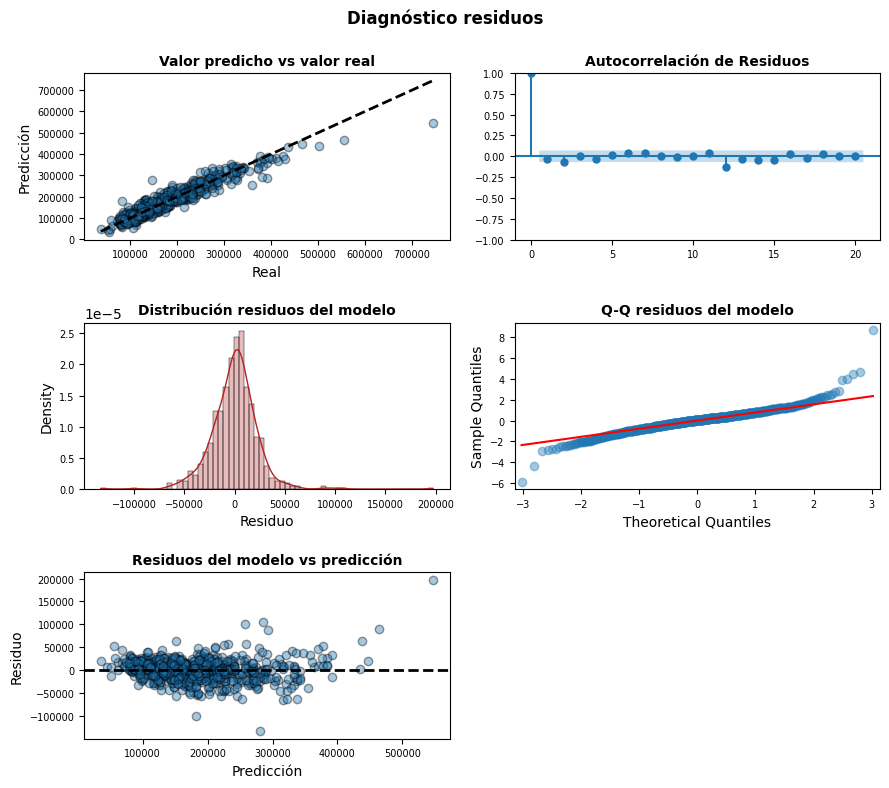

In [62]:
general_diagnosis(y_train,y_pred,0.05)

In [63]:
pd.to_pickle(lr,'./modelo1Examen.pkl')

In [64]:
pd.read_pickle('./modelo1Examen.pkl')

LinearRegression()

In [65]:
df_test

,onehot__OverallQual_4,scale__TotalBsmtSF,scale__GarageArea,scale__FullBath,scale__YearBuilt,onehot__BsmtQual_4,onehot__Foundation_PConc,onehot__KitchenQual_4,onehot__BsmtQual_2,onehot__HeatingQC_4,onehot__OverallQual_2,scale__Fireplaces,onehot__BsmtFinType1_GLQ,scale__MasVnrArea,onehot__ExterQual_4,scale__BsmtFinSF1,onehot__GarageType_Attchd,scale__LotArea,onehot__Neighborhood_NridgHt,onehot__MasVnrType_Stone,onehot__SaleCondition_Partial,onehot__Foundation_CBlock,onehot__SaleType_New,onehot__HeatingQC_2,onehot__MasVnrType_None,onehot__FireplaceQu_3,onehot__KitchenQual_3,onehot__Exterior1st_VinylSd,onehot__OverallQual_1,onehot__Neighborhood_NoRidge,onehot__MSZoning_RM,scale__OpenPorchSF,scale__WoodDeckSF,onehot__CentralAir_Y,onehot__BsmtQual_3,onehot__OverallCond_2,scale__GarageYrBlt,onehot__BsmtExposure_No,onehot__BsmtExposure_Gd,scale__2ndFlrSF,onehot__LotShape_Reg,onehot__MSZoning_RL,onehot__SaleType_WD,onehot__GarageType_NA,onehot__Electrical_SBrkr,onehot__Neighborhood_OldTown,onehot__RoofStyle_Gable,onehot__OverallCond_1,onehot__PavedDrive_Y,scale__LotFrontage,onehot__Neighborhood_Edwards,onehot__Neighborhood_StoneBr,onehot__Neighborhood_NAmes,onehot__HouseStyle_2Story,onehot__OverallQual_3,onehot__ExterCond_2,onehot__SaleCondition_Normal,onehot__Neighborhood_Somerst,onehot__Exterior1st_Wd Sdng,onehot__Exterior1st_MetalSd,onehot__BsmtCond_1,scale__EnclosedPorch,onehot__FireplaceQu_2,onehot__MasVnrType_BrkFace,onehot__LandContour_HLS
1022,0.0,0.003306,-1.098024,-1.100662,-0.307828,0.0,0.0,0.0,1.0,0.0,1.0,-0.931780,1.0,-0.613811,0.0,0.516456,1.0,-0.320604,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.757942,0.775059,1.0,0.0,0.0,0.172705,1.0,0.0,-0.787306,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.385964,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.351259,0.0,0.0,0.0
1023,1.0,0.977668,1.148291,0.779439,0.702676,1.0,1.0,0.0,0.0,1.0,0.0,2.265188,1.0,1.570428,0.0,1.381158,1.0,0.598949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.262883,0.726757,1.0,0.0,1.0,0.248943,0.0,0.0,1.840575,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.231906,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.351259,1.0,1.0,0.0
1024,0.0,-0.119696,-0.616671,-1.100662,-1.481315,0.0,0.0,0.0,1.0,0.0,1.0,0.666704,0.0,-0.613811,0.0,-1.037196,0.0,-0.189923,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.757942,-0.770630,1.0,0.0,1.0,0.084171,1.0,0.0,-0.787306,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.037006,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.895377,0.0,0.0,0.0
1025,0.0,-0.129343,-0.315825,0.779439,-0.829378,0.0,0.0,0.0,1.0,1.0,1.0,2.265188,0.0,-0.613811,0.0,-0.102193,0.0,-1.137717,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.386648,-0.770630,1.0,0.0,0.0,0.140735,1.0,0.0,0.758506,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-0.218279,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.270886,0.0,0.0,0.0
1026,1.0,1.356319,2.151109,0.779439,1.126435,1.0,1.0,1.0,0.0,1.0,0.0,0.666704,1.0,-0.191445,0.0,1.357725,1.0,0.752606,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.757942,1.064876,1.0,0.0,1.0,0.283373,0.0,1.0,-0.787306,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.959996,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-0.351259,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,-0.003930,-0.877403,-1.100662,-0.470812,0.0,0.0,0.0,1.0,0.0,1.0,-0.931780,0.0,-0.613811,0.0,0.945292,1.0,-0.377567,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.757942,-0.770630,1.0,0.0,1.0,0.160409,1.0,0.0,-0.787306,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.385964,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.351259,0.0,0.0,0.0
1456,0.0,0.251720,-1.318644,-1.100662,-0.568603,0.0,0.0,0.0,1.0,1.0,0.0,-0.931780,0.0,-0.613811,0.0,-0.437294,1.0,-0.941457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.758176,0.372536,1.0,0.0,0.0,0.153031,1.

In [67]:
predicciones = lr.predict(df_test)

In [108]:
df_test_ori

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1023,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1,1024,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
2,1025,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
3,1026,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
4,1027,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1456,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,846,Unf,0,210,1056,GasA,Fa,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1958.0,RFn,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
434,1457,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,3,8,1955,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,256,Unf,0,906,1162,GasA,Ex,Y,SBrkr,1163,0,0,1163,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,220,Fa,TA,Y,142,98,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
435,1458,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
436,1459,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0,Unf,0,684,684,GasA,Gd,Y,SBrkr,684,512,0,1196,0,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2,528

In [75]:
len(predicciones)

438

In [109]:
df_predicciones['SalePricePrediction'] = pd.DataFrame(predicciones)

In [111]:
df_predicciones = df_predicciones['SalePricePrediction']

In [112]:
df_predicciones

0      150137.914872
1      378443.922920
2       93211.076570
3      192587.508712
4      348645.998661
           ...      
433    127221.947883
434    109165.088059
435    197032.114871
436    139476.454356
437    429084.623975
Name: SalePricePrediction, Length: 438, dtype: float64

In [113]:
df_predicciones_final=pd.merge( df_test_ori,df_predicciones, left_index=True, right_index=True)


In [114]:
df_predicciones_final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePricePrediction
0,1023,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,150137.914872
1,1024,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,378443.922920
2,1025,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,93211.076570
3,1026,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,192587.508712
4,1027,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,348645.998661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1456,20,RL,70.0,8176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1992,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,846,Unf,0,210,1056,GasA,Fa,Y,SBrkr,1056,0,0,1056,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1958.0,RFn,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,127221.947883
434,1457,20,RM,49.0,5820,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,3,8,1955,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,256,Unf,0,906,1162,GasA,Ex,Y,SBrkr,1163,0,0,1163,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,220,Fa,TA,Y,142,98,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109165.088059
435,1458,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,197032.114871
436,1459,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd S

In [115]:
df_predicciones_final = df_predicciones_final[['Id','SalePricePrediction']]

In [119]:
df_predicciones_final.to_csv('sp_res_NKSR1.csv',index=False)